In [21]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

In [23]:
from scripts.financial_analysis import FinancialDataAnalyzer
from scripts.utils import load_financial_data

In [33]:
#load data
stock_prefix = 'TSLA'
stock_data = load_financial_data(stock_prefix)

# show the first 5 rows of the stock data
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [34]:
# Display the shape of the DataFrame and check for missing values
print(f"Data shape: {stock_data.shape}")


# Check for missing values in the DataFrame
print("Missing values:")
print(stock_data.isnull().sum())

Data shape: (3545, 9)
Missing values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [35]:
analyzer = FinancialDataAnalyzer(stock_data, stock_prefix)
analyzer.change_to_datetime()

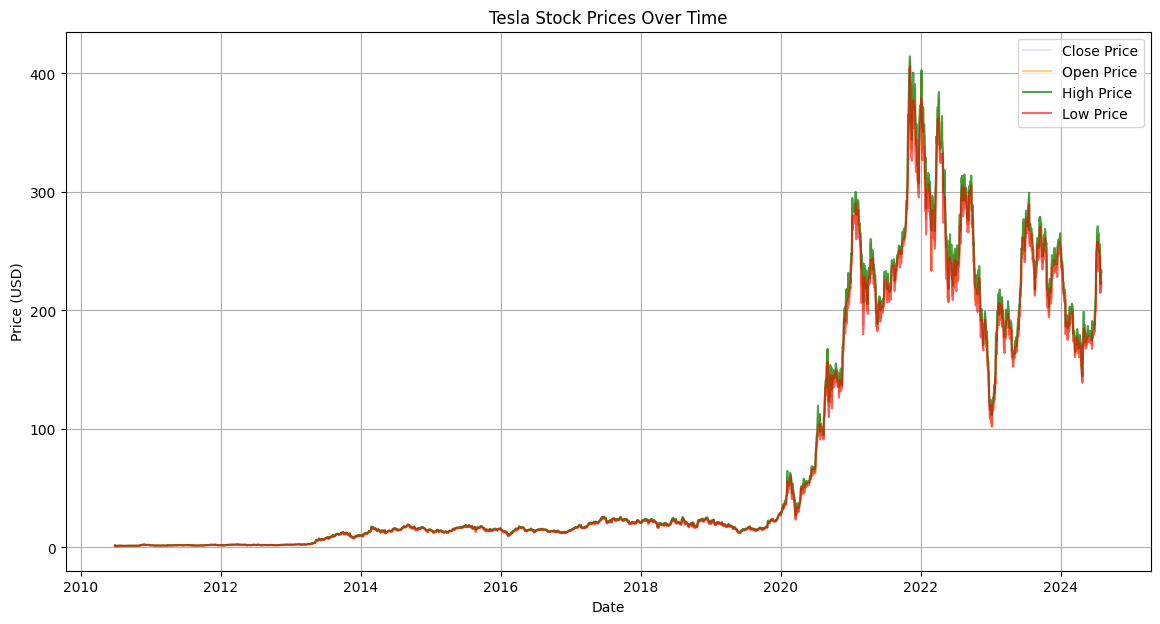

d:\active_repos\10_academy\Week-1-predicting-price-moves\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


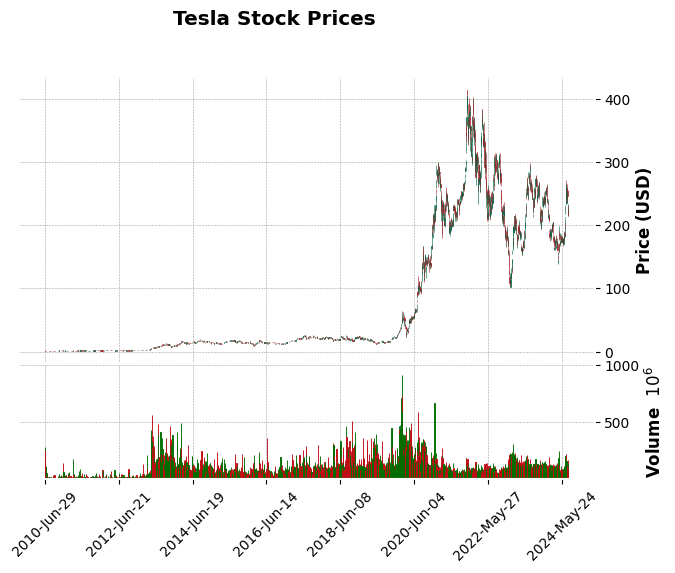

In [36]:
analyzer.plot_stock_prices()

In [39]:
analyzer.analyze_stock_price_trends()

Stock Price Trend Analysis for Tesla:
Trend
Up           1832
Down         1702
No Change      11
Name: count, dtype: int64


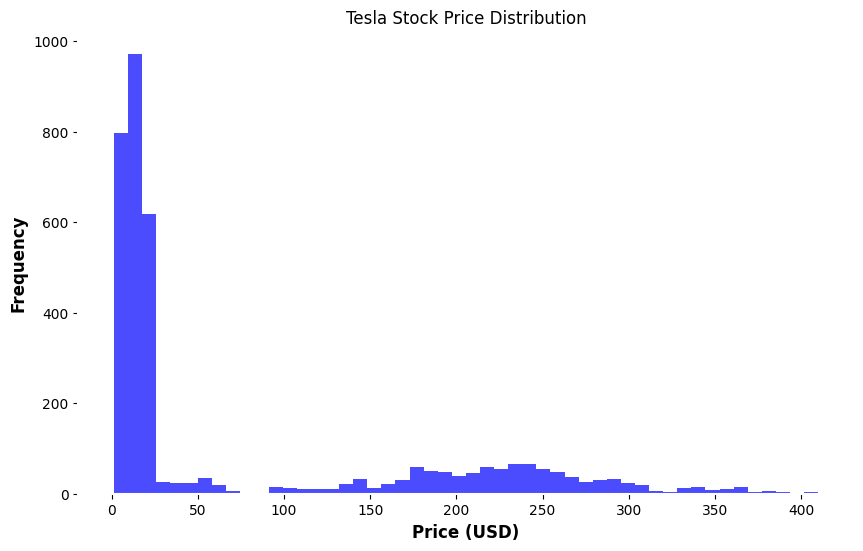

In [40]:
analyzer.visualize_stock_price_distribution()

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on TSLA historical data.

In [37]:
analyzer.calculate_technical_indicators()

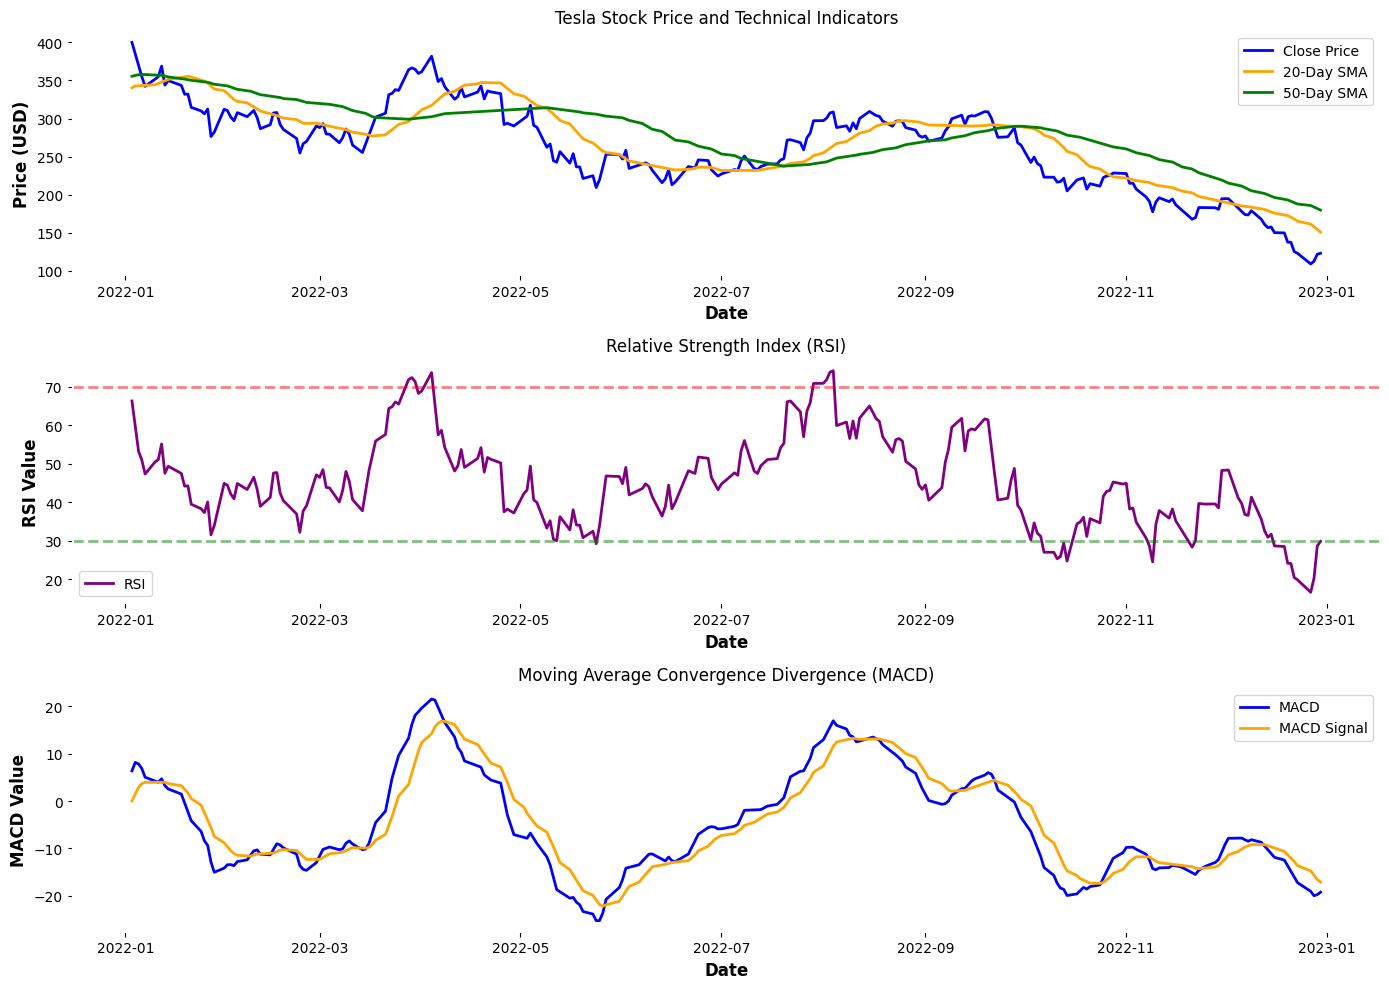

In [38]:
analyzer.plot_technical_indicators(start_date='2022-01-01', end_date='2022-12-31')
